In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from math import log
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#Generating DataSet
path_root = "/content/drive/MyDrive/malware/dataset_9010/dataset_9010/malimg_dataset/train"
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

imgs,labels = next(batches)

Found 8510 images belonging to 25 classes.


KeyboardInterrupt: ignored

In [ ]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [ ]:
imgs.shape

(8510, 64, 64, 3)

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

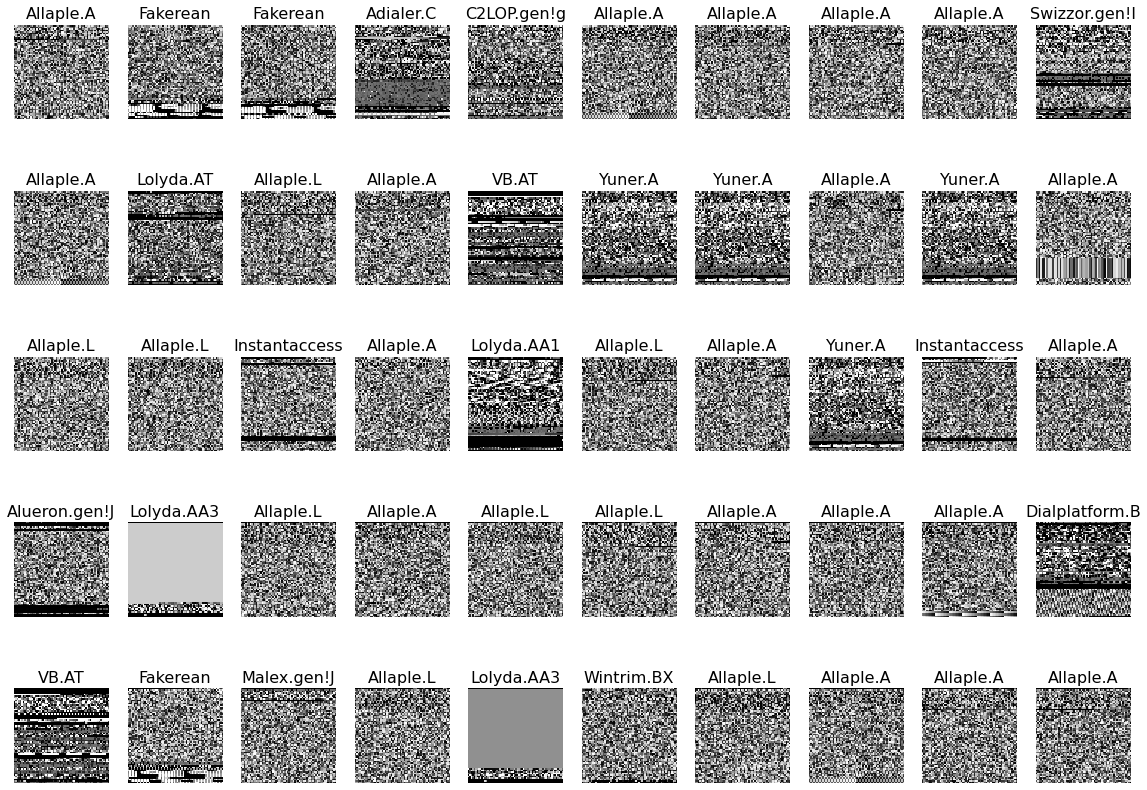

In [ ]:
plots(imgs, titles = labels)

In [ ]:
classes = batches.class_indices.keys()

In [ ]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

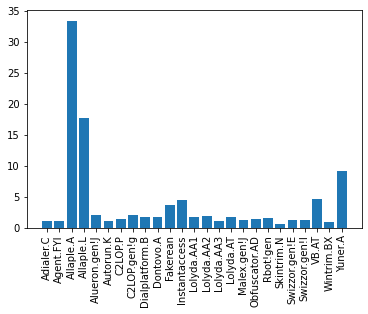

In [ ]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

#Test and Train

In [ ]:
#Lets split our model into train and test following a ratio 70% train - 30% test ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [ ]:
X_train.shape

(5957, 64, 64, 3)

In [ ]:
X_test.shape

(2553, 64, 64, 3)

In [ ]:
X_train[0]

array([[[0.89411765, 0.89411765, 0.89411765],
        [0.00392157, 0.00392157, 0.00392157],
        [0.27058825, 0.27058825, 0.27058825],
        ...,
        [0.        , 0.        , 0.        ],
        [0.07450981, 0.07450981, 0.07450981],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.27450982, 0.27450982, 0.27450982],
        [0.14117648, 0.14117648, 0.14117648],
        [0.        , 0.        , 0.        ],
        ...,
        [0.2901961 , 0.2901961 , 0.2901961 ],
        [0.05882353, 0.05882353, 0.05882353],
        [0.01568628, 0.01568628, 0.01568628]],

       [[0.5176471 , 0.5176471 , 0.5176471 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.35686275, 0.35686275, 0.35686275],
        ...,
        [0.3137255 , 0.3137255 , 0.3137255 ],
        [0.7647059 , 0.7647059 , 0.7647059 ],
        [0.01568628, 0.01568628, 0.01568628]],

       ...,

       [[0.7137255 , 0.7137255 , 0.7137255 ],
        [0.8       , 0.8       , 0.8       ],
        [0.        , 0

In [ ]:
y_train.shape

(5957, 25)

In [ ]:
y_test.shape

(2553, 25)

#CNN MODEL

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization

In [ ]:
num_classes = 25

In [ ]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [ ]:
Malware_model = malware_model()


In [ ]:
Malware_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0

In [ ]:
y_train.shape


(5957, 25)

In [ ]:
y_train_new = np.argmax(y_train, axis=1)


In [ ]:
y_train_new

array([24, 11,  2, ..., 24,  2, 23])

In [ ]:
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
class_weights =compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(y_train_new),
                                        y = y_train_new)


In [ ]:

Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
187/187 [==============================] - 28s 147ms/step - loss: 1.8182 - accuracy: 0.4527 - val_loss: 0.9508 - val_accuracy: 0.6694
Epoch 2/10
187/187 [==============================] - 27s 145ms/step - loss: 0.8708 - accuracy: 0.7198 - val_loss: 0.4230 - val_accuracy: 0.9033
Epoch 3/10
187/187 [==============================] - 27s 145ms/step - loss: 0.5155 - accuracy: 0.8472 - val_loss: 0.2911 - val_accuracy: 0.9170
Epoch 4/10
187/187 [==============================] - 27s 144ms/step - loss: 0.3907 - accuracy: 0.8811 - val_loss: 0.2170 - val_accuracy: 0.9330
Epoch 5/10
187/187 [==============================] - 27s 145ms/step - loss: 0.3280 - accuracy: 0.8978 - val_loss: 0.1802 - val_accuracy: 0.9420
Epoch 6/10
187/187 [==============================] - 29s 156ms/step - loss: 0.2684 - accuracy: 0.9156 - val_loss: 0.1771 - val_accuracy: 0.9471
Epoch 7/10
187/187 [==============================] - 29s 155ms/step - loss: 0.2501 - accuracy: 0.9231 - val_loss: 0.1515 - val_ac

In [ ]:
scores = Malware_model.evaluate(X_test, y_test)

80/80 [==============================] - 3s 39ms/step - loss: 0.1247 - accuracy: 0.9604


In [ ]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9604387283325195


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
predicted=Malware_model.predict(X_test)
predicted_values=[np.argmax(i) for i in predicted]

80/80 [==============================] - 3s 39ms/step


In [ ]:

y_pred = np.argmax(Malware_model.predict(X_test, verbose=0))


In [ ]:
y_pred

609

In [ ]:

y_test2 = np.argmax(y_test, axis=1)

In [ ]:
y_test2

array([ 3,  2, 22, ...,  2,  9, 24])

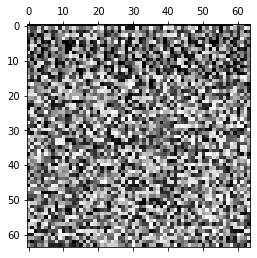

In [ ]:
plt.matshow(X_test[0])

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

c_matrix = metrics.confusion_matrix(y_test2, predicted_values)


In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


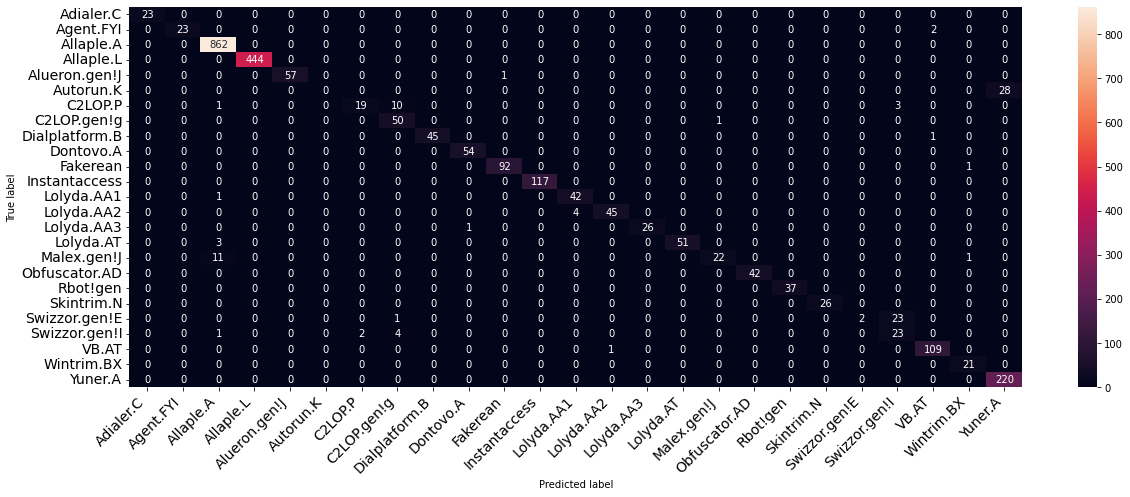

In [ ]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)
